# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


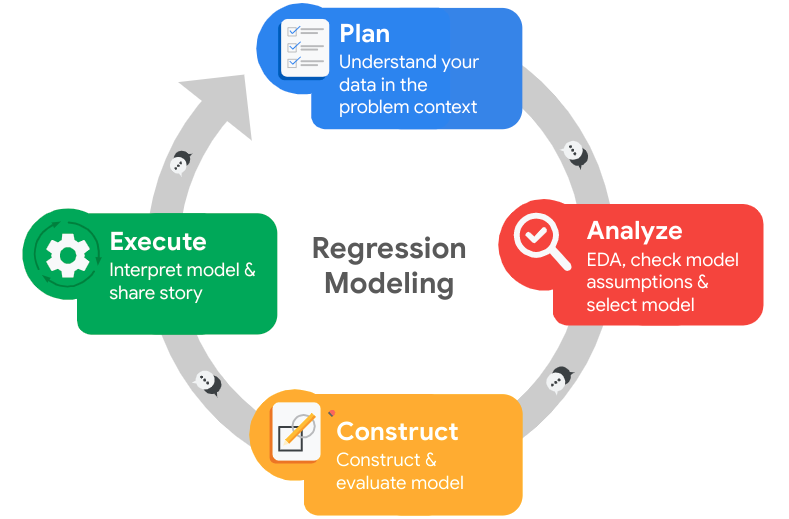

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- The stakeholders are HR department and management of Salifort motors.
- What factors affecting employees to leave the company?
- There are no missing values, 3008 duplicated values,  and 824 outliers.
- Python and its libraries (pandas and seaborn)
- Not at the moment.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                   'time_spend_company': 'tenure',
                   'Work_accident': 'work_accident',
                   'Department': 'department'},
          inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


There are 3008 duplicates in this dataset.  With 10 columns of features, it is likely to be truly duplicates, and can be dropped.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

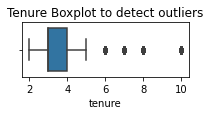

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(3,1))
sns.boxplot(x=df1['tenure'])
plt.title('Tenure Boxplot to detect outliers')
plt.show()

There are some outliers in tenure variable. 

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
p25 = df1['tenure'].quantile(0.25)
p75 = df1['tenure'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr
print('Upper Limit: ', upper_limit)
print('Lower Limit: ', lower_limit)
outliers = df1[(df1['tenure']>upper_limit) | (df1['tenure']<lower_limit)]
print('Number of outliers: ', len(outliers))

Upper Limit:  5.5
Lower Limit:  1.5
Number of outliers:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- The correlation heatmap confirms that the number of projects, average monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.
- Employees who left are 16.6% from the data and employees who stay are 83.3%.
- We split the tenure variable to short and long tenure, to see the relationship between tenure and salary earned.
- The main purpose of EDA is to look at the data before making any assumptions that leads to construct stage.
- Python and its libraries (pandas, numpy and seaborn)
- No, we are trying to help HR to find most important factors to improve retention.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

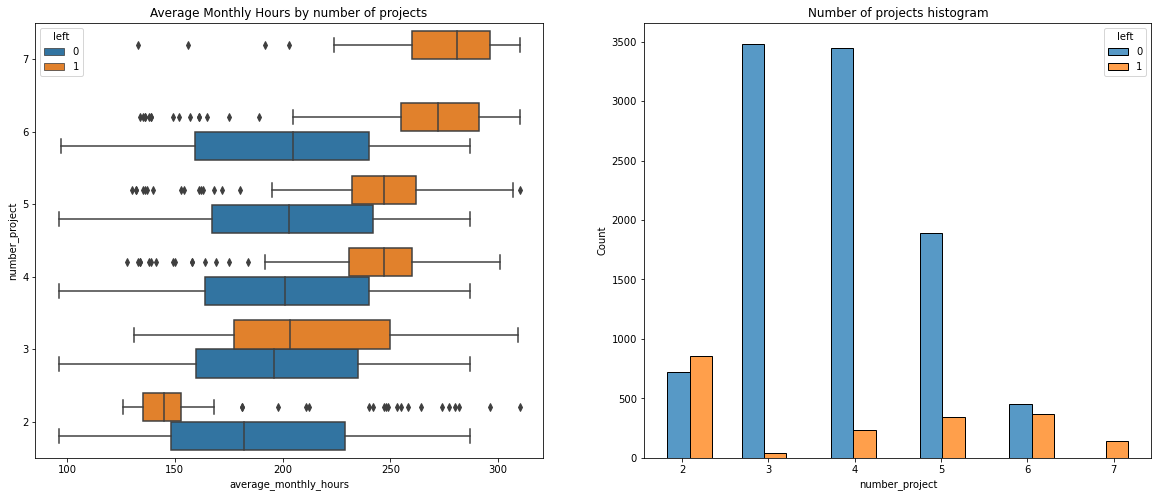

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Average Monthly Hours by number of projects')

sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('Number of projects histogram')
plt.show()

1. It seems the more project and more average monthly hours, the higher number of employees left, with exception of the ones who left with 2 projects with low average monthly hours.
2. All employees with 7 projects left the company.
3. Normal average monthly hours should be around 166.67 hours (50 weeks * 40 hours/week / 12 months). Average (mean) monthly hours of this company is higher than 166.67 hours, it seems the majority of employees are overworked.
4. The lowest number of employees who left are working in three projects.

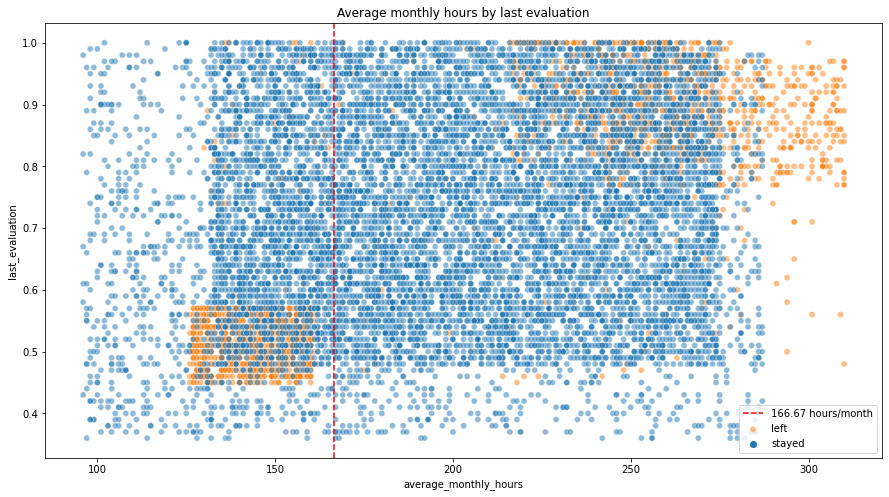

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='r', ls='--')
plt.legend(['166.67 hours/month', 'left', 'stayed'])
plt.title('Average monthly hours by last evaluation')
plt.show()

1. From plot above, we confirm that majority of employees are overworked (more than 166.67 hours/month)
2. There are employees who left have last evaluation around 0.5 and below normal average work hours. It is difficult to speculate why these employees who left.
3. There are also employees who left have last evaluation around 0.9 but have 220-275 average monthly hours. This is probably because of overworked.
4. The shape of this plot is abit strange, maybe the result of data manipulation.

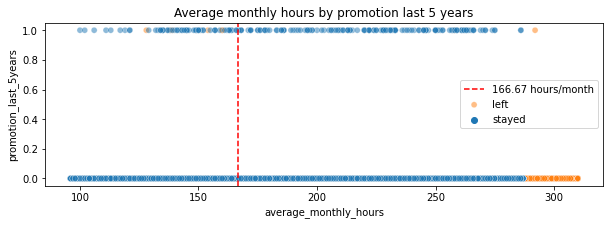

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='r', ls='--')
plt.legend(['166.67 hours/month', 'left', 'stayed'])
plt.title('Average monthly hours by promotion last 5 years')
plt.show()

1. The employees, who were promoted in the last 5 years, rarely left the company.
2. The employees, who were working most hours, rarely got promoted in the last 5 years.
3. Almost all employees who left, were working the most hours.

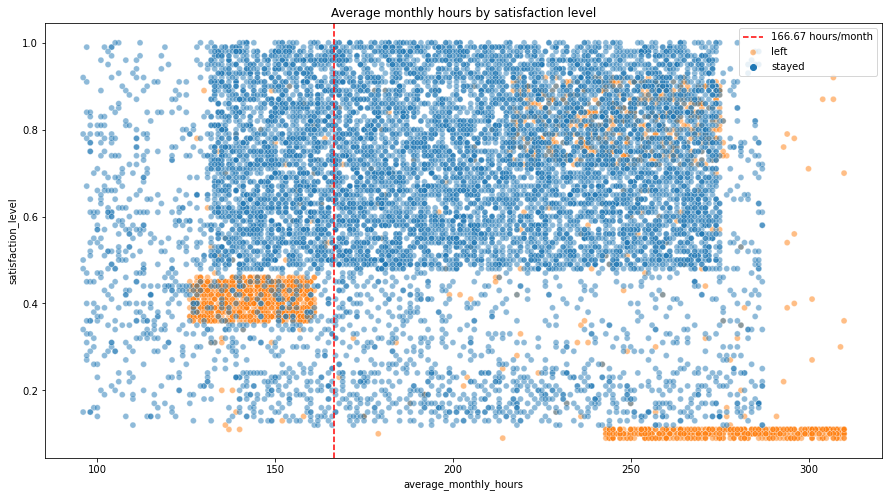

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.axvline(x=166.67, color='r', ls='--')
plt.legend(['166.67 hours/month', 'left', 'stayed'])
plt.title('Average monthly hours by satisfaction level')
plt.show()

1. From plot above, we confirm that majority of employees are overworked (more than 166.67 hours/month)
2. There are employees who left have satisfaction level around 0.4 and below normal average work hours. It is difficult to speculate for these employees who left.
3. There are also employees who left have satisfaction level around 0.8 but have 220-275 average monthly hours. This is probably because of overworked.
4. Finally there are employees who left have almost zero satisfaction level and have 240-320 average monthly hours. Clearnly this is because of overworked.
5. The shape of this plot is also abit strange, maybe the result of data manipulation.

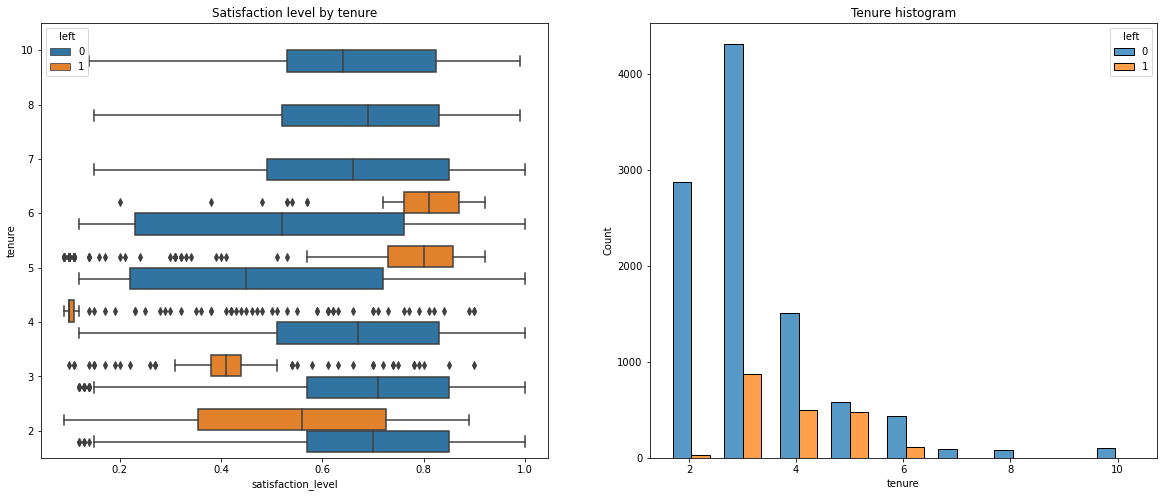

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level by tenure')

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=8, ax=ax[1])
ax[1].set_title('Tenure histogram')
plt.show()

1. No employees, who worked seven or more year tenure, left. It is possible after long tenure, these employees are high ranking or high paid employees.
2. Four-year tenure employees, who left, have unusually low satisfaction level.
3. The employees who left are mostly in third-year tenure, followed by fourth-year and fifth-year tenure.

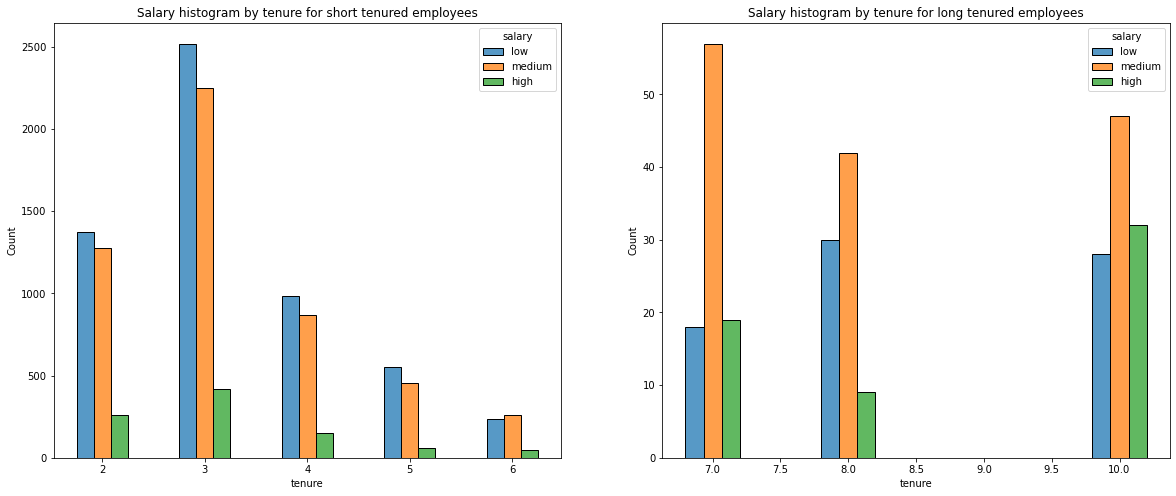

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(20,8))
short_tenure = df1[df1['tenure']<=6]
long_tenure = df1[df1['tenure']>6]
sns.histplot(data=short_tenure, x='tenure', hue='salary', hue_order=['low','medium','high'], multiple='dodge', discrete=1, shrink=0.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure for short tenured employees')

sns.histplot(data=long_tenure, x='tenure', hue='salary', hue_order=['low','medium','high'], multiple='dodge', discrete=1, shrink=0.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure for long tenured employees')
plt.show()

The plot above shows that salary grow proportionately with tenure.

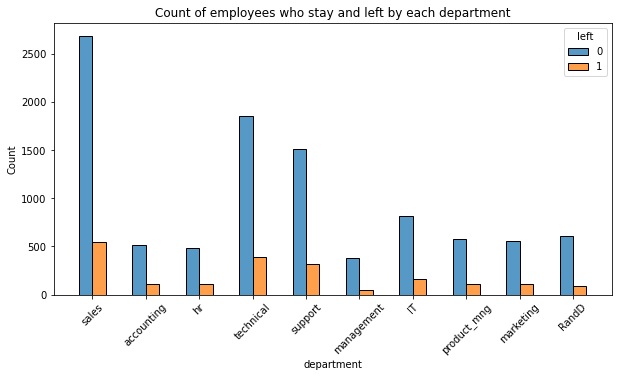

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,5))
sns.histplot(data=df1, x='department', hue='left', discrete=1,
            hue_order=[0,1], multiple='dodge', shrink=0.5)
plt.xticks(rotation='45')
plt.title('Count of employees who stay and left by each department')
plt.show()

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

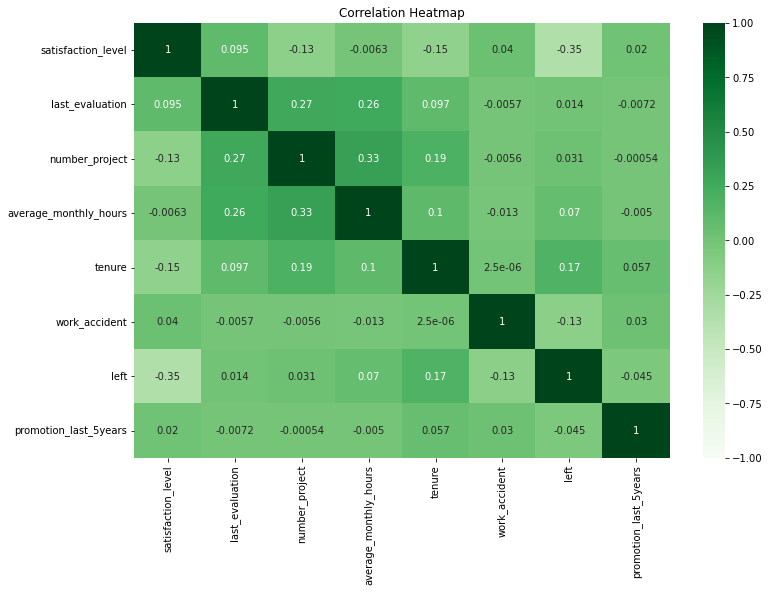

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('Greens', as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap confirms that the number of projects, average monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

Employees who left are generally work more hours, work on many projects, and lower satisfaction levels. This could be a result of poor management who do not appreciate employees hard work. However if the employees spend more than 6 years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- There is a chance that there is some data leakage occurring, dropped a suspect feature, and did feature engineering to improve the first models.
- We choose every variables (except variable left which is dependent variable) in the first models, and dropped satisfaction_level variable and engineered a new feature overworked.
- Yes, logistic regression model assumptions are all met.
- We construct logistic regression model and tree-based models (2 iterations), tree-based models models are better models than logistic regression.
- We might improve the model by creating new feature by engineering.
- Python and its libraries (seaborn, sklearn, and pickle)
- No. This model can help HR in predicting which employees who will leave the company, so this will actually can help employees also.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our goal is to predict whether an employee leaves the company, which is a categorical outcome variable. Categorical outcome variable involves binary classification (either 0 or 1 as outcome).

### Identify the types of models most appropriate for this task.

Since the variable we want to predict is categorical, we could either construct a Logistic Regression model, or a Tree-based Machine Learning model.

### Modeling

Add as many cells as you need to conduct the modeling process.

### Logistic Regression Model

In [22]:
# Encode non-numeric variables
### YOUR CODE HERE ###
df_enc = df1.copy()

df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)
df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


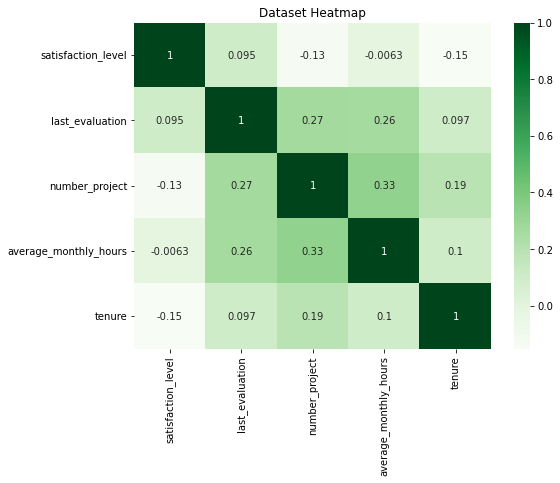

In [23]:
# Create heatmap to visualize correlated variables
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(),
            annot=True, cmap='Greens')
plt.title('Dataset Heatmap')
plt.show()

No high correlation among 5 independent variables.

In [24]:
# Isolate outliers
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# Select variables
y = df_logreg['left']
X = df_logreg.drop(columns=['left'], axis=1)

In [26]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [27]:
%%time
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

CPU times: user 24 s, sys: 29 s, total: 53 s
Wall time: 26.5 s


In [28]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

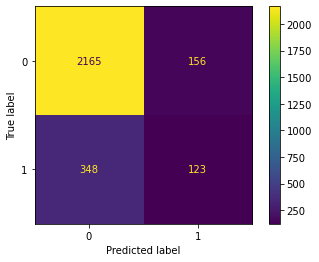

In [29]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)
disp.plot(values_format='')
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [30]:
# Check class balance
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an 83.1%-16.9% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, we might want to resample the data to make it more balanced. In this case, we can use this data without modifying the class balance and continue evaluating the model.

In [31]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### Tree-based Model

In [32]:
# Select variables
y = df_enc['left']
X = df_enc.drop(columns=['left'], axis=1)

In [33]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Decision Tree - first - iteration.

In [34]:
# Construct a decision tree model
tree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth' : [4,6,8,None],
            'min_samples_leaf' : [1,2,5],
            'min_samples_split' : [2,4,6]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [35]:
%%time
# Fit it to the training dataset
tree1.fit(X_train, y_train)

CPU times: user 2.82 s, sys: 0 ns, total: 2.82 s
Wall time: 2.82 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [36]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [37]:
# Check best score (roc_auc)
tree1.best_score_

0.9758952535925409

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [38]:
# Write a function that will help you extract all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    
    metric_dict = {'accuracy' : 'mean_test_accuracy',
                  'precision' : 'mean_test_precision',
                  'recall' : 'mean_test_recall',
                  'f1' : 'mean_test_f1',
                  'auc' : 'mean_test_roc_auc'}
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    accuracy = best_estimator_results.mean_test_accuracy
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1
    auc = best_estimator_results.mean_test_roc_auc
    
    table = pd.DataFrame()
    table = pd.DataFrame({'model' : [model_name],
                         'accuracy' : [accuracy],
                         'precision' : [precision],
                         'recall' : [recall],
                         'f1' : [f1],
                         'auc' : [auc]})
    
    return table

In [39]:
# Get all scores from decision tree model
tree1_cv_results = make_results('Decision Tree1 CV', tree1, 'auc')
tree1_cv_results

,model,accuracy,precision,recall,f1,auc
0,Decision Tree1 CV,0.981208,0.966878,0.918288,0.941941,0.975895


All of these scores from the decision tree model are strong indicators of good model performance. Decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions.

#### Random Forest - first - iteration.

In [40]:
# Construct a random forest model
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth' : [3,5,None],
            'max_features': [1.0],
            'max_samples' : [0.7, 1.0],
            'min_samples_leaf' : [1,2,3],
            'min_samples_split' : [2,3,4],
            'n_estimators' : [300,500]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
%%time
# Fit it to the training dataset
rf1.fit(X_train, y_train)

CPU times: user 9min 10s, sys: 0 ns, total: 9min 10s
Wall time: 9min 10s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [42]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [43]:
# Write a function to save fitted model
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [44]:
# Write a function to load fitted model
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [45]:
# Write pickle
write_pickle(path, rf1, 'salifort_rf1')

In [46]:
# Read pickle
rf1 = read_pickle(path, 'salifort_rf1')

In [47]:
# Check best score (roc_auc)
rf1.best_score_

0.9819627407970256

In [48]:
# Check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [49]:
# Get all scores from random forest model
rf1_cv_results = make_results('Random Forest1 CV', rf1, 'auc')
results = pd.concat([tree1_cv_results, rf1_cv_results], axis=0)
results

,model,accuracy,precision,recall,f1,auc
0,Decision Tree1 CV,0.981208,0.966878,0.918288,0.941941,0.975895
0,Random Forest1 CV,0.977872,0.946285,0.918956,0.932377,0.981963


The evaluation scores of decision tree consistently better than those of random forest model, with the exception of auc score. However since the main metric is auc, and all random forest model scores are above 90%, random forest model still will be chosen.

In [50]:
# Write a function to get all the scores from a model's prediction
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)
    
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    auc = roc_auc_score(y_test_data, preds)
    
    table = pd.DataFrame({'model' : [model_name],
                         'accuracy' : [accuracy],
                         'precision' :[precision],
                         'recall' : [recall],
                         'f1' : [f1],
                         'auc' : [auc]})
    
    return table

In [51]:
# Get predictions on test data
rf1_test_scores = get_scores('Random forest1 test', rf1, X_test, y_test)
results = pd.concat([results, rf1_test_scores], axis=0)
results

,model,accuracy,precision,recall,f1,auc
0,Decision Tree1 CV,0.981208,0.966878,0.918288,0.941941,0.975895
0,Random Forest1 CV,0.977872,0.946285,0.918956,0.932377,0.981963
0,Random forest1 test,0.980987,0.960334,0.923695,0.941658,0.958047


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, We can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

#### Feature Engineering

There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

We can make new feature from existing feature in order to improve our model. We will drop satisfaction_level feature and create new feature based on average_monthly_hours feature. The first iteration of decision tree and random forest included all variables as features, the second iteration will incorporate new feature engineering to build improved models.

In [52]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop(columns=['satisfaction_level'], axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
# Create `overworked` column
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max working hours: ', df2['overworked'].max())
print('Min working hours: ', df2['overworked'].min())

Max working hours:  310
Min working hours:  96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. You could define being overworked as working more than 175 hours/month on average. Also make this column binary, working hours > 175 hours/month is 1, and working hours <= 175 hours/month is 0.

In [54]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [55]:
# Drop the `average_monthly_hours` column
df2 = df2.drop(columns=['average_monthly_hours'], axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
# Select variables
y = df2['left']
X = df2.drop(columns=['left'], axis=1)

In [57]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Decision Tree - second - iteration.

In [58]:
# Construct a decision tree model
tree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth' : [4,6,8,None],
            'min_samples_leaf' : [1,2,5],
            'min_samples_split' : [2,4,6]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [59]:
%%time
# Fit it to the training dataset
tree2.fit(X_train, y_train)

CPU times: user 2.26 s, sys: 0 ns, total: 2.26 s
Wall time: 2.26 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [60]:
# Check best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [61]:
# Check best score (roc_auc)
tree2.best_score_

0.9560690460829713

This model performs very well, even without satisfaction levels and detailed hours worked data. 

In [62]:
# Get all scores from decision tree model
tree2_cv_results = make_results('Decision Tree2 CV', tree2, 'auc')
results = pd.concat([results, tree2_cv_results], axis=0)
results

,model,accuracy,precision,recall,f1,auc
0,Decision Tree1 CV,0.981208,0.966878,0.918288,0.941941,0.975895
0,Random Forest1 CV,0.977872,0.946285,0.918956,0.932377,0.981963
0,Random forest1 test,0.980987,0.960334,0.923695,0.941658,0.958047
0,Decision Tree2 CV,0.952851,0.831453,0.902894,0.864811,0.956069


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

#### Random Forest - second - iteration.

In [63]:
# Construct a random forest model
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth' : [3,5,None],
            'max_features': [1.0],
            'max_samples' : [0.7, 1.0],
            'min_samples_leaf' : [1,2,3],
            'min_samples_split' : [2,3,4],
            'n_estimators' : [300,500]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [64]:
%%time
# Fit it to the training dataset
rf2.fit(X_train, y_train)

CPU times: user 6min 51s, sys: 0 ns, total: 6min 51s
Wall time: 6min 51s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [65]:
# Write pickle
write_pickle(path, rf2, 'salifort_rf2')

In [66]:
# Read in pickle
rf2 = read_pickle(path, 'salifort_rf2')

In [67]:
# Check best score (roc_auc)
rf2.best_score_

0.9673141551136663

In [68]:
# Check best parameters
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [69]:
# Get all scores from random forest model
rf2_cv_results = make_results('Random Forest2 CV', rf2, 'auc')
results = pd.concat([results, rf2_cv_results], axis=0)
results

,model,accuracy,precision,recall,f1,auc
0,Decision Tree1 CV,0.981208,0.966878,0.918288,0.941941,0.975895
0,Random Forest1 CV,0.977872,0.946285,0.918956,0.932377,0.981963
0,Random forest1 test,0.980987,0.960334,0.923695,0.941658,0.958047
0,Decision Tree2 CV,0.952851,0.831453,0.902894,0.864811,0.956069
0,Random Forest2 CV,0.957633,0.855755,0.896177,0.875413,0.967314


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric. 

In [70]:
# Get predictions on test data
rf2_test_scores = get_scores('Random forest2 test', rf2, X_test, y_test)
results = pd.concat([results, rf2_test_scores], axis=0)
results

,model,accuracy,precision,recall,f1,auc
0,Decision Tree1 CV,0.981208,0.966878,0.918288,0.941941,0.975895
0,Random Forest1 CV,0.977872,0.946285,0.918956,0.932377,0.981963
0,Random forest1 test,0.980987,0.960334,0.923695,0.941658,0.958047
0,Decision Tree2 CV,0.952851,0.831453,0.902894,0.864811,0.956069
0,Random Forest2 CV,0.957633,0.855755,0.896177,0.875413,0.967314
0,Random forest2 test,0.962975,0.868571,0.915663,0.891496,0.944031


This seems to be a stable, well-performing final model. 

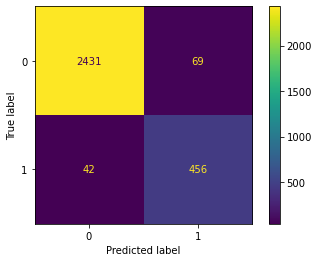

In [71]:
# Create confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='')
plt.show()

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

#### Decision tree splits

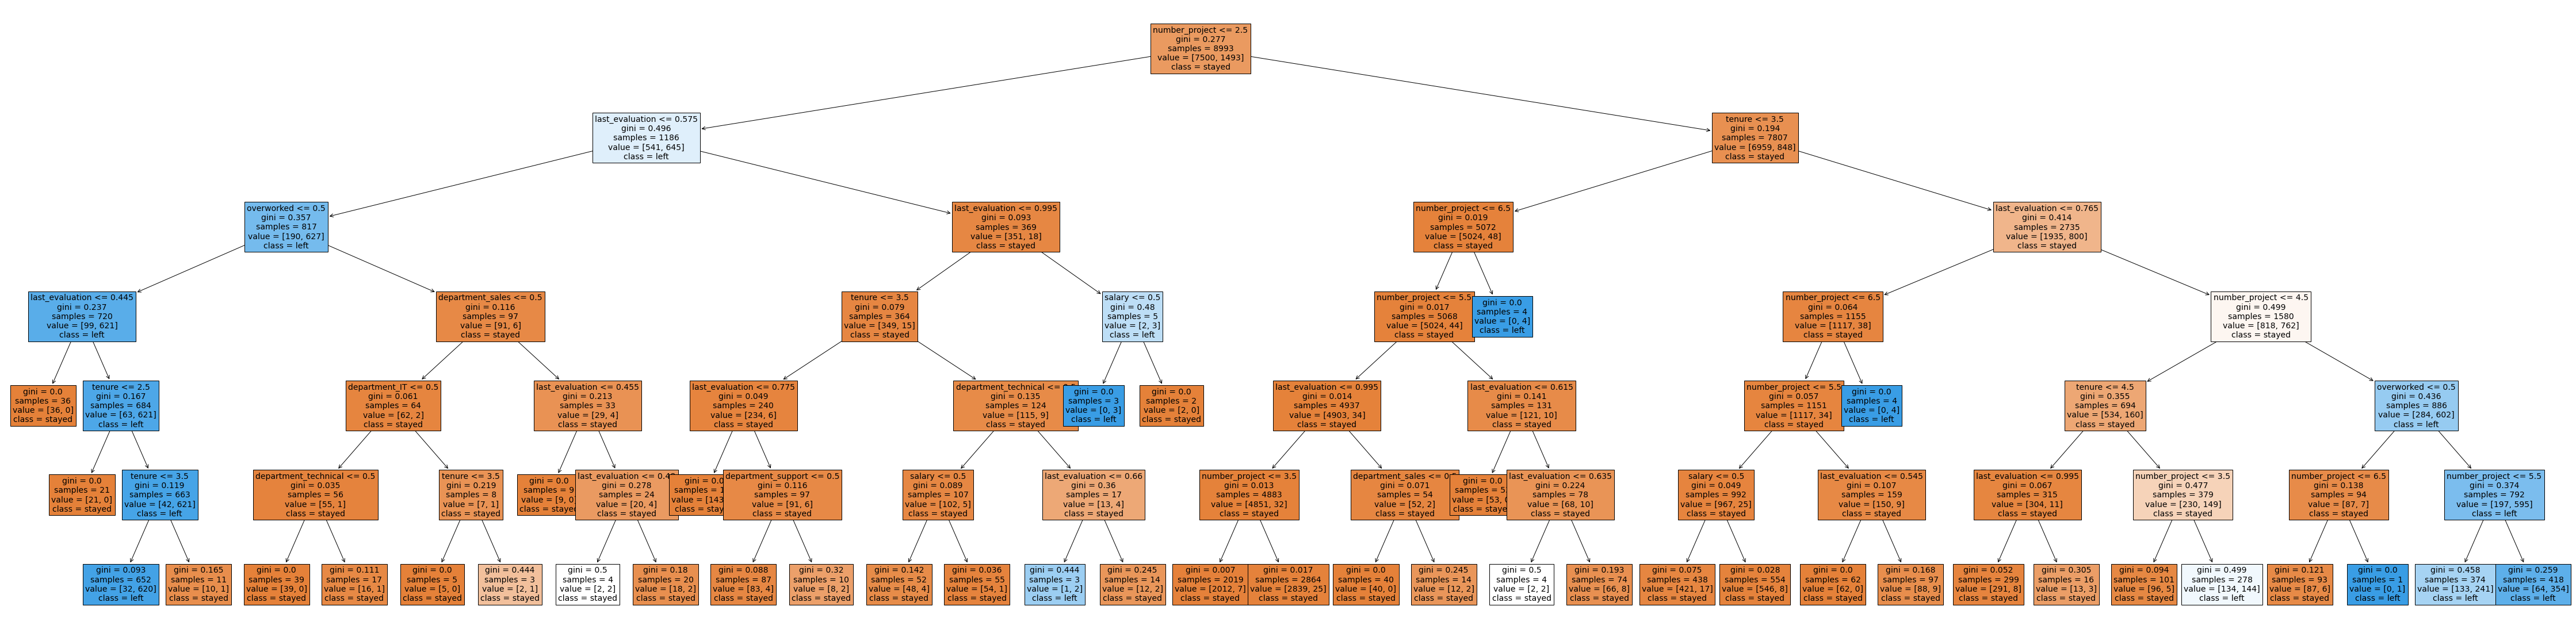

In [72]:
# Plot the tree
plt.figure(figsize=(80,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
         class_names={0 : 'stayed', 1 : 'left'}, filled=True)
plt.show()

#### Decision tree feature importance

In [73]:
# Feature importance for decision tree model
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.343930
last_evaluation,0.335089
tenure,0.213517
overworked,0.104462
salary,0.001610
department_technical,0.000630
department_sales,0.000434
department_support,0.000238
department_IT,0.000090


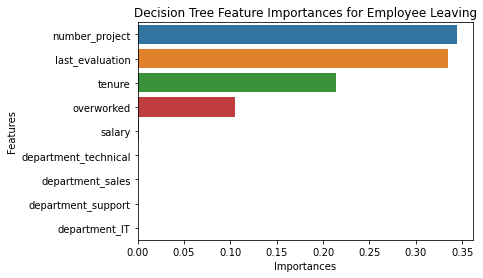

In [74]:
# Visualize decision tree feature importances
sns.barplot(data=tree2_importances, x='gini_importance', y=tree2_importances.index, orient='h')
plt.title('Decision Tree Feature Importances for Employee Leaving')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.show()

The barplot above shows that in this decision tree model, number_project, last_evaluation, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

#### Random forest feature importance

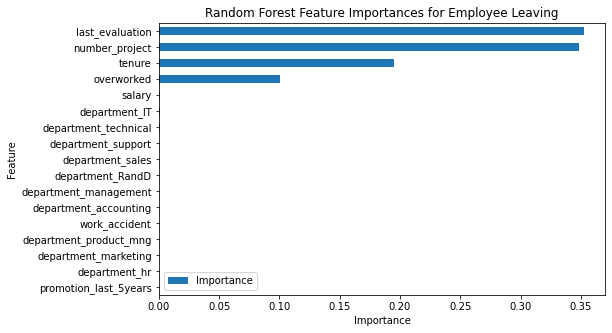

In [75]:
# Visualize random forest feature importances
y_df = pd.DataFrame({'Feature' : X.columns, 'Importance' : rf2.best_estimator_.feature_importances_})
y_sort_df = y_df.sort_values('Importance')
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot()

y_sort_df.plot(kind = 'barh', ax = ax1, x = 'Feature', y = 'Importance')

ax1.set_title('Random Forest Feature Importances for Employee Leaving')
ax1.set_ylabel('Feature')
ax1.set_xlabel('Importance')

plt.show()

The plot above shows that in this random forest model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- From random forest model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order.
- Might want to recruit more low-level employees to alleviate the work load.
- Lower the working hours and number of projects for each employees or reward employees more for their overtime work.
- Yes, by feature engineered new features.
- Some questions need to be asked, such as: why after working 4 years a lot of employees leave the company?
- Confusion matrix and plot importances.
- Already stated before.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%., on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the random forest model achieved AUC of 94.4%, precision of 86.9%, recall of 91.6%, f1-score of 89.1%, and accuracy of 96.3%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

- Limit the number of projects that employees work on concurrently.
- Consider promoting employees who have been with the company for at least four years, and also conduct investigation about why four-year tenured employees are so dissatisfied.
- Either reward employees for working longer hours, or don't require them to do so. 
- If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
- Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
- High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.